Proyek TimeSeries: **London Weather Dataset**
- Nama:**ERIKA BUDIARTI**
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LSTM, MaxPooling1D, Conv1D

# **Load Dataset**

In [2]:
df_london= pd.read_csv('/content/london_weather.csv')

In [3]:
df_london

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [4]:
df_london.shape

(15341, 10)

# **Data Cleaning**

In [5]:
selected_columns = df_london[['date','mean_temp']]
df_london = selected_columns.copy()

In [6]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       15341 non-null  int64  
 1   mean_temp  15305 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


In [7]:
df_london['date'] = pd.to_datetime(df_london['date'], format='%Y%m%d')
df_london['year'] = df_london['date'].dt.year
df_london['month'] = df_london['date'].dt.month
df_london['day'] = df_london['date'].dt.day

df_london.drop('date', axis=1, inplace=True)
df_london = df_london.rename(columns={'mean_temp': 'temperature'})

# Reorder columns as 'day', 'month', 'year', 'temperature'
df_london = df_london[['day', 'month', 'year', 'temperature']]

In [8]:
df_london

,day,month,year,temperature
0,1,1,1979,-4.1
1,2,1,1979,-2.6
2,3,1,1979,-2.8
3,4,1,1979,-2.6
4,5,1,1979,-0.8
...,...,...,...,...
15336,27,12,2020,7.5
15337,28,12,2020,1.1
15338,29,12,2020,2.6
15339,30,12,2020,2.7


In [9]:
df_london.isna().sum()

day             0
month           0
year            0
temperature    36
dtype: int64

In [10]:
mean_value = df_london['temperature'].mean()
df_london['temperature'].fillna(mean_value, inplace=True)

In [11]:
df_london.isna().sum()

day            0
month          0
year           0
temperature    0
dtype: int64

In [12]:
df_london

,day,month,year,temperature
0,1,1,1979,-4.1
1,2,1,1979,-2.6
2,3,1,1979,-2.8
3,4,1,1979,-2.6
4,5,1,1979,-0.8
...,...,...,...,...
15336,27,12,2020,7.5
15337,28,12,2020,1.1
15338,29,12,2020,2.6
15339,30,12,2020,2.7


# **Time Series Plot**

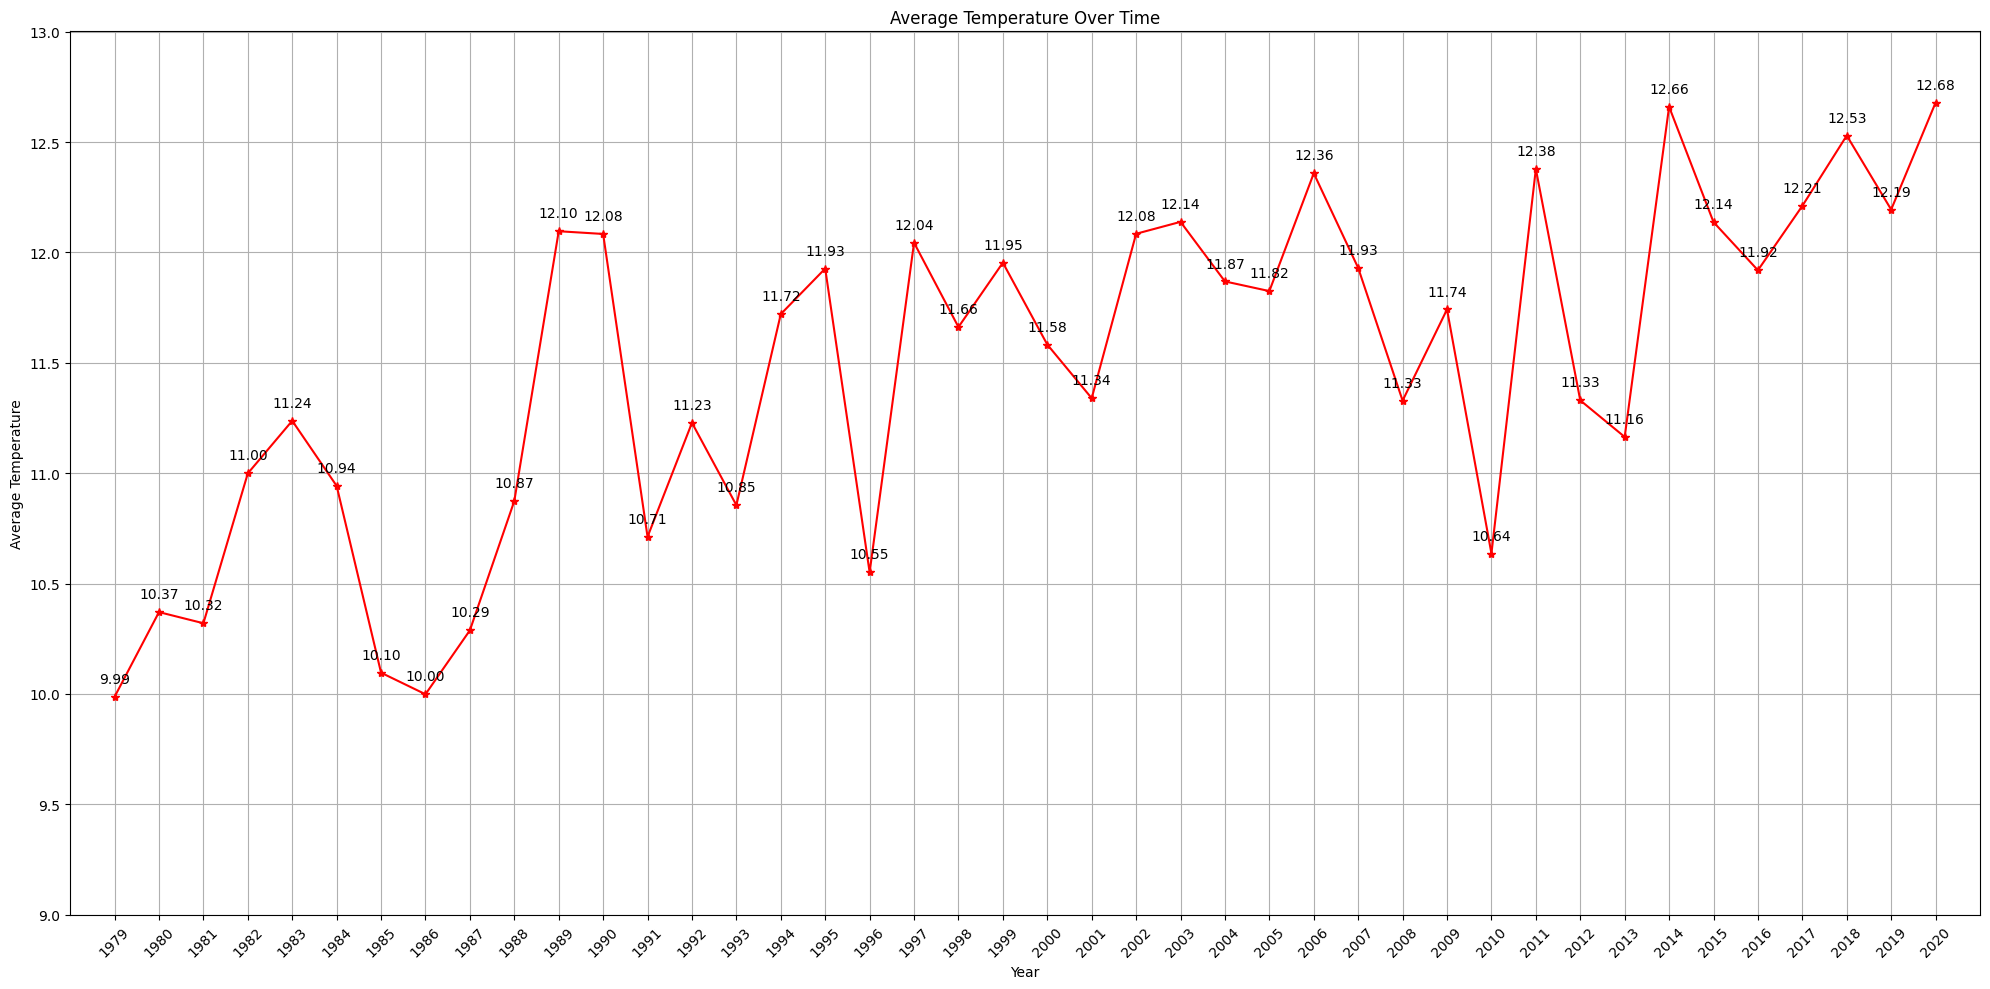

In [13]:
yearly_mean = df_london.groupby(['year'])['temperature'].mean().reset_index()

plt.figure(figsize=(20, 10))
plt.plot(yearly_mean['year'], yearly_mean['temperature'], marker='*', linestyle='-' , color='red')

min_year = yearly_mean['year'].min()
max_year = yearly_mean['year'].max()
plt.xlim((min_year-1), (max_year+1))
plt.xticks(yearly_mean['year'], rotation=45)

max_temperature = yearly_mean['temperature'].max()
min_temperature = yearly_mean['temperature'].min()
y_ticks = np.arange(min_temperature - 0.987, max_temperature + 0.323, 0.5)
plt.yticks(y_ticks)
plt.ylim((min_temperature -0.987), (max_temperature +0.323))

for i, row in yearly_mean.iterrows():
    plt.annotate(f'{row["temperature"]:.2f}', (row['year'], row['temperature']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()



# **Split DataSet**

In [14]:
X = df_london[['month', 'year']]
y = df_london['temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# **Build Model**

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda w: (w[:-1], w[-1:]))
    return dataset.batch(batch_size).prefetch(1)

In [16]:
train_london = windowed_dataset(y_train, window_size=64, batch_size=100, shuffle_buffer=1000)
train_london = train_london.map(lambda x, y: (tf.cast(x, tf.float32), tf.cast(y, tf.float32)))

In [17]:
val_london = windowed_dataset(y_test, window_size=64, batch_size=100, shuffle_buffer=1000)
val_london = val_london.map(lambda x, y: (tf.cast(x, tf.float32), tf.cast(y, tf.float32)))

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(64, 1))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, input_shape=(64, 1))),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Conv1D(32, 2, activation='relu'),
    tf.keras.layers.Conv1D(16, 2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="linear")
])

In [20]:
loss = 'mean_squared_error'

In [21]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9)

In [22]:
optimizer = Adam(learning_rate=lr_schedule)

In [23]:
threshold_mae = (df_london['temperature'].max() - df_london['temperature'].min()) * 10/100
threshold_mae

3.66

In [24]:
class iCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold_mae):
        self.threshold_mae = threshold_mae

    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_mae') < self.threshold_mae and
        logs.get('mae') < self.threshold_mae):
            print(f"\nReached threshold MAE ({self.threshold_mae}). Stopping training.")
            self.model.stop_training = True

callback_model = iCallback(threshold_mae)


In [25]:
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=["mae"])


In [26]:
history = model.fit(train_london,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = val_london,
                    callbacks=[callback_model],
                    verbose=2)


Epoch 1/10
123/123 - 59s - loss: 71.4612 - mae: 6.5250 - val_loss: 66.5283 - val_mae: 6.8267 - 59s/epoch - 480ms/step
Epoch 2/10
123/123 - 19s - loss: 30.4049 - mae: 3.9773 - val_loss: 27.1088 - val_mae: 3.9613 - 19s/epoch - 152ms/step
Epoch 3/10

Reached threshold MAE (3.66). Stopping training.
123/123 - 20s - loss: 24.4919 - mae: 3.5352 - val_loss: 21.4745 - val_mae: 3.4497 - 20s/epoch - 160ms/step


# **Plot Loss dan Accuracy**

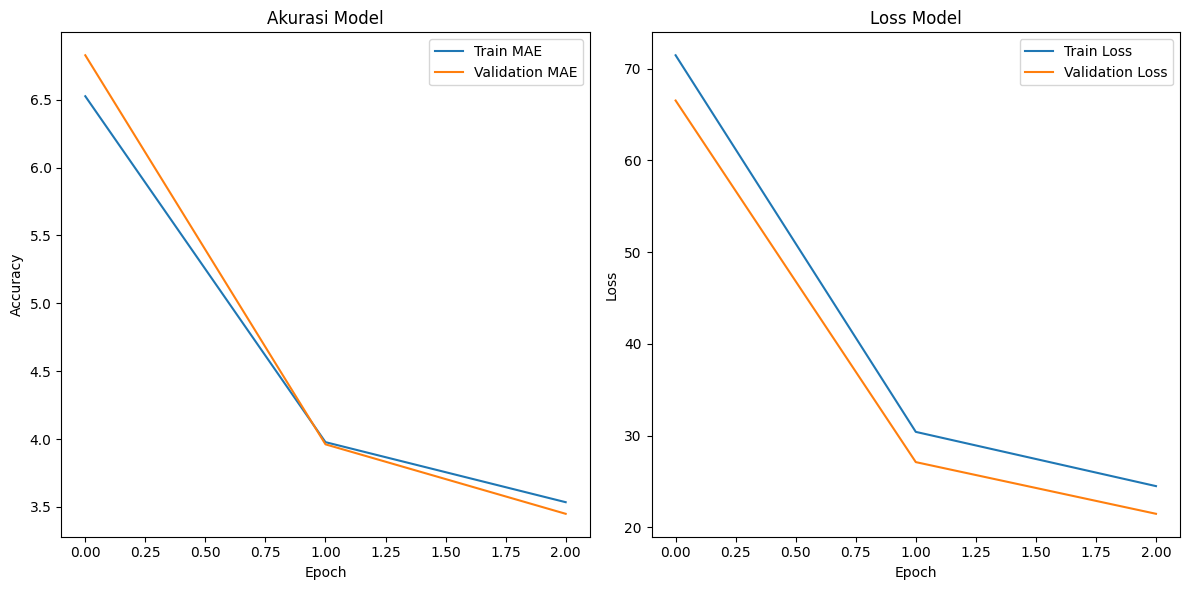

In [28]:
# Data akurasi
train_accuracy = history.history['mae']
val_accuracy = history.history['val_mae']

# Data loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pertama (Akurasi)
axes[0].plot(train_accuracy, label='Train MAE')
axes[0].plot(val_accuracy, label='Validation MAE')
axes[0].set_title('Akurasi Model')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper right')

# Plot kedua (Loss)
axes[1].plot(train_loss, label='Train Loss')
axes[1].plot(val_loss, label='Validation Loss')
axes[1].set_title('Loss Model')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()